In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import math
import numpy as np
import matplotlib.dates as mdates
import scipy.stats as stats

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [8]:
df = pd.read_excel(
    'C:/Users/海棠微雨/Desktop/C题/附件1.xlsx',
    sheet_name='Sheet1',
    header=0,  # 第一行作为列名
    usecols='A:D',  # 读取 A 到 D 列
    index_col=None,  # 第一列作为行索引
    skiprows=0,  # 不跳过
    nrows=None  # 读取所有 行
)
df1 = pd.read_excel(
    'C:/Users/海棠微雨/Desktop/C题/附件2.xlsx',
    sheet_name='Sheet1',
    header=0,  # 第一行作为列名
    usecols='A:G',  # 读取 A 到 G 列
    index_col=None,  # 第一列作为行索引
    skiprows=0,  # 不跳过
    nrows=None  # 读取所有 行
)

In [17]:
def creat_dict(j, List):
    Dict = {}
    seen = set()
    for i in List:
        Key = str(i)
        if Key[:j] not in seen:
            Dict[Key[:j]] = [[], [], [], [], [], []]  # 你可以把对应的值设置为任意值
            seen.add(Key[:j])
    return Dict

In [18]:
encoder = df['单品编码']
name = df['分类名称']
# 使用 zip() 函数将两个列表合并为一个字典
my_dict = dict(zip(encoder, name))
encoder1 = list(df1['单品编码'])
date = list(df1['销售日期'])
sales = list(df1['销量(千克)'])
sales_type = list(df1['销售类型'])

# 使用列表推导式过滤数据
encoder1 = [e for i, e in enumerate(encoder1) if sales_type[i] != '退货']
date = [d for i, d in enumerate(date) if sales_type[i] != '退货']
sales = [s for i, s in enumerate(sales) if sales_type[i] != '退货']
sales_type = [t for t in sales_type if t != '退货']
length = len(date)

A, B, C, D, E, F = '花叶类', '花菜类', '辣椒类', '茄类', '食用菌', '水生根茎类'

In [19]:
date_dict = creat_dict(10, date)
for i in range(length):
    if my_dict[encoder1[i]] == '花叶类':
        date_dict[str(date[i])[:10]][0].append(sales[i])
    elif my_dict[encoder1[i]] == '花菜类':
        date_dict[str(date[i])[:10]][1].append(sales[i])
    elif my_dict[encoder1[i]] == '辣椒类':
        date_dict[str(date[i])[:10]][2].append(sales[i])
    elif my_dict[encoder1[i]] == '茄类':
        date_dict[str(date[i])[:10]][3].append(sales[i])
    elif my_dict[encoder1[i]] == '食用菌':
        date_dict[str(date[i])[:10]][4].append(sales[i])
    elif my_dict[encoder1[i]] == '水生根茎类':
        date_dict[str(date[i])[:10]][5].append(sales[i])

In [20]:
date_dict1 = creat_dict(10, date)
for i, j in zip(date_dict.values(), date_dict1.values()):
    for k, v in zip(i, j):
        v.append(math.fsum(k))

In [21]:
data_A, data_B, data_C, data_D, data_E, data_F = [], [], [], [], [], []
for i in date_dict1.values():
    data_A.append(i[0][0])
    data_B.append(i[1][0])
    data_C.append(i[2][0])
    data_D.append(i[3][0])
    data_E.append(i[4][0])
    data_F.append(i[5][0])

A, B, C, D, E, F = '花叶类', '花菜类', '辣椒类', '茄类', '食用菌', '水生根茎类'

            花叶类       花菜类       辣椒类        茄类       食用菌     水生根茎类
花叶类    1.000000  0.633454  0.595045  0.252732  0.596222  0.438869
花菜类    0.633454  1.000000  0.429713  0.193012  0.462420  0.396029
辣椒类    0.595045  0.429713  1.000000  0.104238  0.534781  0.333866
茄类     0.252732  0.193012  0.104238  1.000000 -0.114516 -0.209961
食用菌    0.596222  0.462420  0.534781 -0.114516  1.000000  0.605354
水生根茎类  0.438869  0.396029  0.333866 -0.209961  0.605354  1.000000

P值矩阵：
       花叶类  花菜类       辣椒类        茄类       食用菌  水生根茎类
花叶类    1.0  0.0  0.000000  0.000000  0.000000    0.0
花菜类    0.0  1.0  0.000000  0.000000  0.000000    0.0
辣椒类    0.0  0.0  1.000000  0.000584  0.000000    0.0
茄类     0.0  0.0  0.000584  1.000000  0.000157    0.0
食用菌    0.0  0.0  0.000000  0.000157  1.000000    0.0
水生根茎类  0.0  0.0  0.000000  0.000000  0.000000    1.0


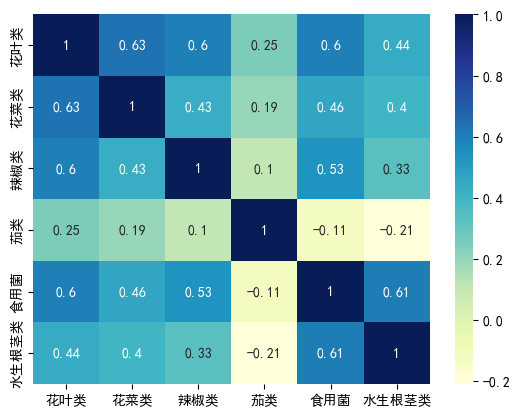

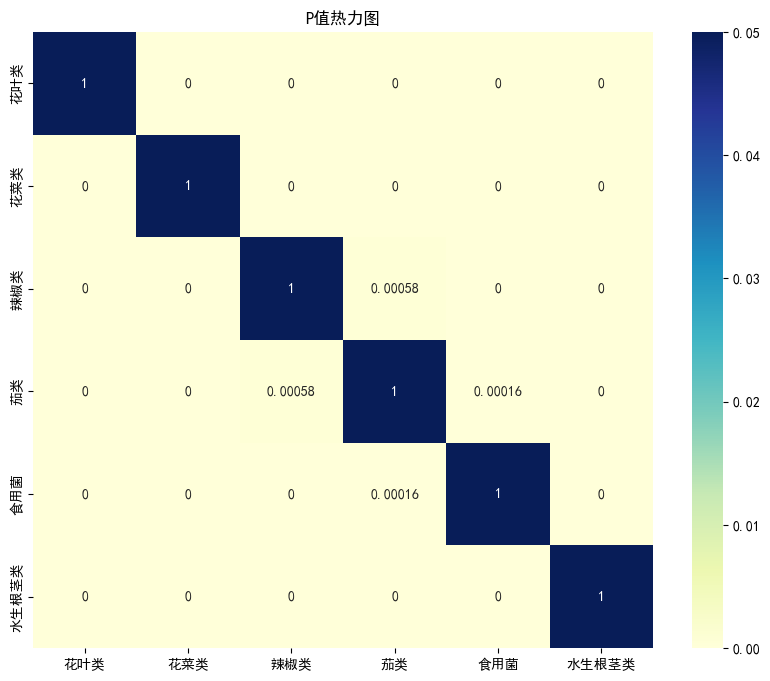

In [27]:
# 构造数据
data = {
    '花叶类': data_A,
    '花菜类': data_B,
    '辣椒类': data_C,
    '茄类': data_D,
    '食用菌': data_E,
    '水生根茎类': data_F
}

df2 = pd.DataFrame(data)

# 计算Spearman相关系数矩阵
corr_matrix = df2.corr(method='spearman')
print(corr_matrix)

# 计算p值矩阵
p_matrix = pd.DataFrame(np.zeros((df2.shape[1], df2.shape[1])), columns=df2.columns, index=df2.columns)
for col1 in df2.columns:
    for col2 in df2.columns:
        if col1 != col2:
            _, p = stats.spearmanr(df2[col1], df2[col2])
            # 如果 p 值过小（例如 < 1e-5），则将其设为 0
            p_matrix.loc[col1, col2] = 0 if p < 1e-5 else p
        else:
            # 自相关的 p 值设为 1
            p_matrix.loc[col1, col2] = 1

print("\nP值矩阵：")
print(p_matrix)

# 绘制相关系数热力图
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

# 绘制p值热力图
plt.figure(figsize=(10, 8))
sns.heatmap(p_matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=0.05)
plt.title('P值热力图')
plt.show()
